# Task 2 : Prediction using Unsupervised Machine Learning
### Predict the optimum number of clusters from the iris dataset and represent it visually.

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Load the iris dataset
df = pd.read_csv("Iris.csv")

In [3]:
df.head()  #view first 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

In [5]:
df.shape   #returns the no of rows and columns

(150, 6)

In [6]:
df.info()  #Basic summary about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()  #checking whether any null values are present

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Extracting Independent Variable

In [8]:
#We are using unsupervised machine learning algorithm so we don't need any dependent variable.

x = df.iloc[:, 1:5] #Extracting independent variable
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# To find optimum number of clusters we use elbow method
# Elbow method use wcss concept

wcss = []

for i in range(1,8):
    km = KMeans(i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [10]:
wcss # within clusters sum of squares

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.34540931571814,
 46.53558205128205,
 38.945953671062355,
 34.318944283786394]

<Figure size 700x500 with 0 Axes>

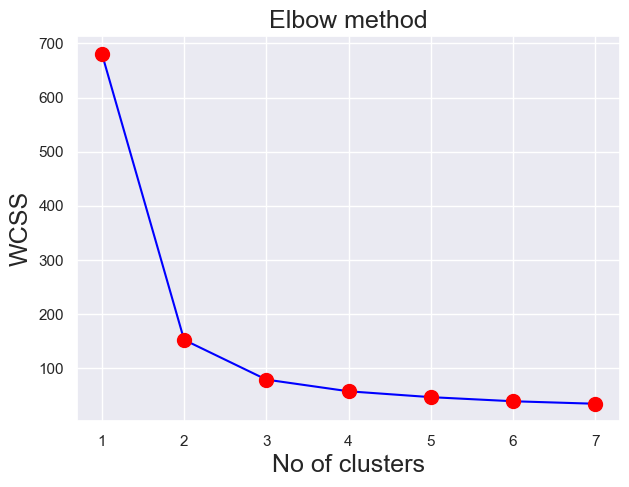

In [11]:
# Elbow method use wcss concept to draw a plot between number of clusters and wcss
# WCSS on Y - axis ranging for different K Values

plt.figure(figsize=(7,5))

plt.figure(figsize=(7,5))
plt.plot(range(1,8),wcss,mec='red',marker='o',mfc='red',ms=10,color='blue')
plt.xlabel('No of clusters',fontsize=18)
plt.ylabel('WCSS',fontsize=18)
plt.title('Elbow method',fontsize=18)
plt.show()

## Problem statement : Predict the optimum number of clusters from the iris dataset

### From the above plot using elbow method we can see that our elbow point is at 3 . So the number of optimum clusters here will be 3

## Training the K-means algorithm on the training dataset

In [12]:
# Training the algorithm
km = KMeans(n_clusters = 3,  init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [13]:
y_pred = km.fit_predict(x) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
# To view the cluster centeroids
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Visualizing the Clusters

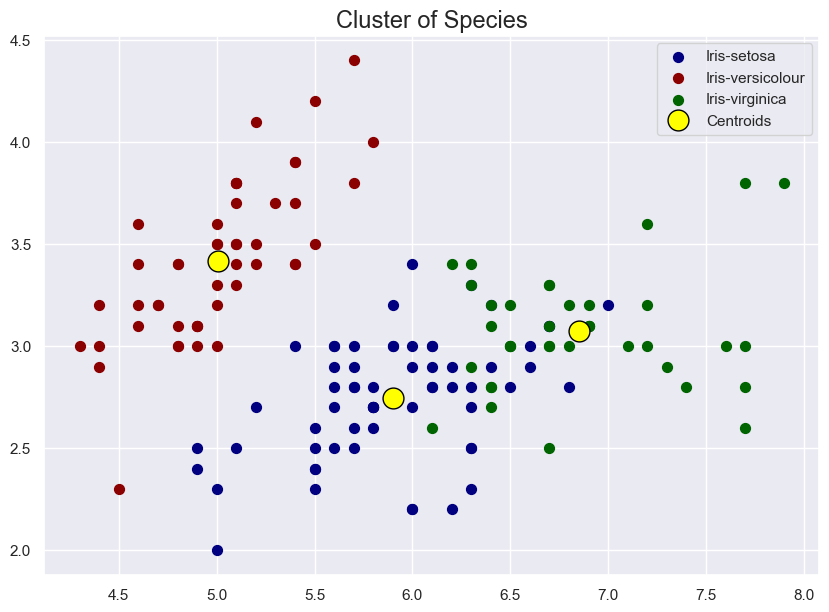

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Visualize Cluster-1 with label 'Iris-setosa'
plt.scatter(x.iloc[y_pred == 0, 0], x.iloc[y_pred == 0, 1], color='navy', s=50, label='Iris-setosa')

# Visualize Cluster-2 with label 'Iris -versicolour'
plt.scatter(x.iloc[y_pred == 1, 0], x.iloc[y_pred == 1, 1], color='darkred', s=50, label='Iris-versicolour')

# Visualize Cluster-3 with label 'Iris-virginica'
plt.scatter(x.iloc[y_pred == 2, 0], x.iloc[y_pred == 2, 1], color='darkgreen', s=50, label='Iris-virginica')

# Visualize Centroids with label 'Centroids'
plt.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'o', color='yellow', label='Centroids', markeredgecolor='black', ms=15)

plt.title('Cluster of Species', fontsize=17)
plt.legend()
plt.show()
